In [1]:
#from google.colab import files
#uploaded = files.upload()

In [115]:
#Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Import all libraries to Evalutation metrics to check model performance
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

#Importing all ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import StackingClassifier                 Need to update sklearn to use inbuilt stacking classifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold


#from imbalanced_learn import UnderSampler, OverSampler, SMOTE

from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [117]:
import io
#df2 = pd.read_csv(io.BytesIO(uploaded['Data file.csv']))
# Dataset is now stored in a Pandas Dataframe

df2 = pd.read_csv('Data file.csv')


In [129]:
#!pip install imbalanced-learn

In [137]:
#!pip install -U imbalanced-learn


Requirement already up-to-date: imbalanced-learn in c:\users\ganesh\anaconda3\lib\site-packages (0.8.0)


In [134]:
#!pip3 install xgboost

In [116]:
#!pip install delayed

In [113]:
#!pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Ganesh\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



# EDA to see the data, what is it and how it looks, to extract information from it.

In [10]:
df2.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
df2.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
df2.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [7]:
df2.shape

(209593, 37)

In [8]:
print(df2.label.value_counts())

1    183431
0     26162
Name: label, dtype: int64


C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label', ylabel='Density'>

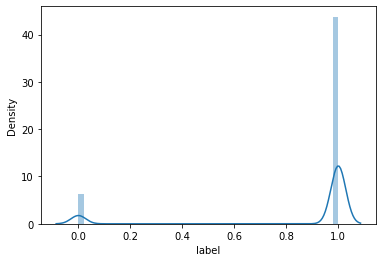

In [9]:
sns.distplot(df2['label'].dropna())

## Here in above distplot it shows imbalance datasets as for 0 category very less no of observations in compared to 1. We have to overcome this problem by using under sampling, oversampling or SMOTE etc technique to banance both the classes to get accurate pridiction which will be free from biases

C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

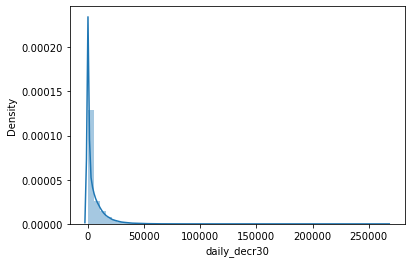

In [10]:
sns.distplot(df2['daily_decr30'].dropna())

In [11]:
df2.info

<bound method DataFrame.info of         Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  las

In [12]:
#df2.describe()
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


# Insights:-
### In the above table, you can see the operation between the data in a certain period such as max, min, std. It describe the data how data is distributed.

C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

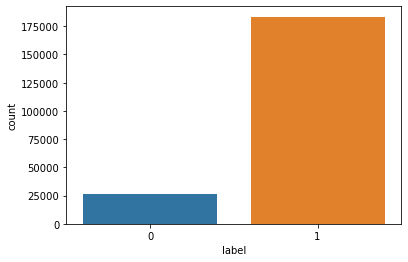

In [13]:
sns.countplot(df2['label'])

### Insight:-
In the above countplot X axis 0 represents loan defaulters persons and 1 shows Non defaulters persons who have paid loans.

In [14]:
df2['label'].value_counts().sort_index()

0     26162
1    183431
Name: label, dtype: int64

## Inference:-
#### Most are having 1 . The ratio is almost 1:7 in favor of status 1(means loan have been paid and not defaulter). So, the model's ability to predict status 1 will be better than predicting status 0(means defaulter) and this shows data imbalance which will effect our predictive modeling and do bias for 1(non defaulter) which have huge no. of observations that 0 (defaulter)

In [5]:
df2.shape

(209593, 37)

In [118]:
df1 = df2.copy()

In [5]:
df1.shape

(209593, 37)

In [166]:
df2.shape

(209593, 37)

In [13]:

df1.head(3)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-08-19


# Data Preprocessing

In [119]:
# Remove two columns name is 'C' and 'D'
#df.drop(['C', 'D'], axis = 1)
  
df1.drop(columns =['Unnamed: 0','msisdn','pcircle','pdate'], inplace= True)

In [15]:
df1.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

#See correlation between the different independent features and with dependent feature as well via correlation matrix and heatmap and also with pair plot too.

In [23]:
df1.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


### Note : from this corr plot we can't see informaition properly so we will go to draw heatmap and pairplot for proper visualization

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(df2.corr(),annot=True,cmap='plasma')

<AxesSubplot:>

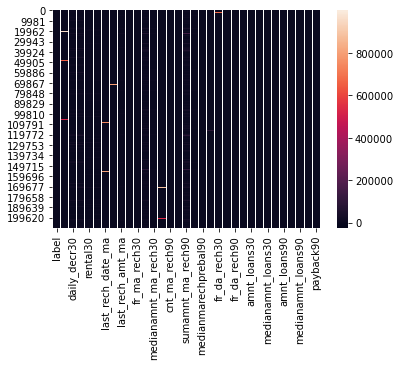

In [20]:
#sns.heatmap(df1,annot=True, fmt='f')
#sns.heatmap(df1,annot=True)
sns.heatmap(df1)

In [21]:
# Let's check the relationship of EXT_SOURCE variables with the TARGET variables
#source = df1[['EXT_SOURCE_1, 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']]

In [22]:
#sns.heatmap(source.corr(),
 #           xticklabels= source.columns,
  #          yticklabels= source.columns,
   #         annot=True,
    #        cmap = 'Reds')

In [ ]:
#sns.pairplot(df1, hue="label", diag_kind="kde")
#sns.pairplot(df2,hue='label',palette='husl')
#sns.pairplot(concrete_df, diag_kind='kde')

C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

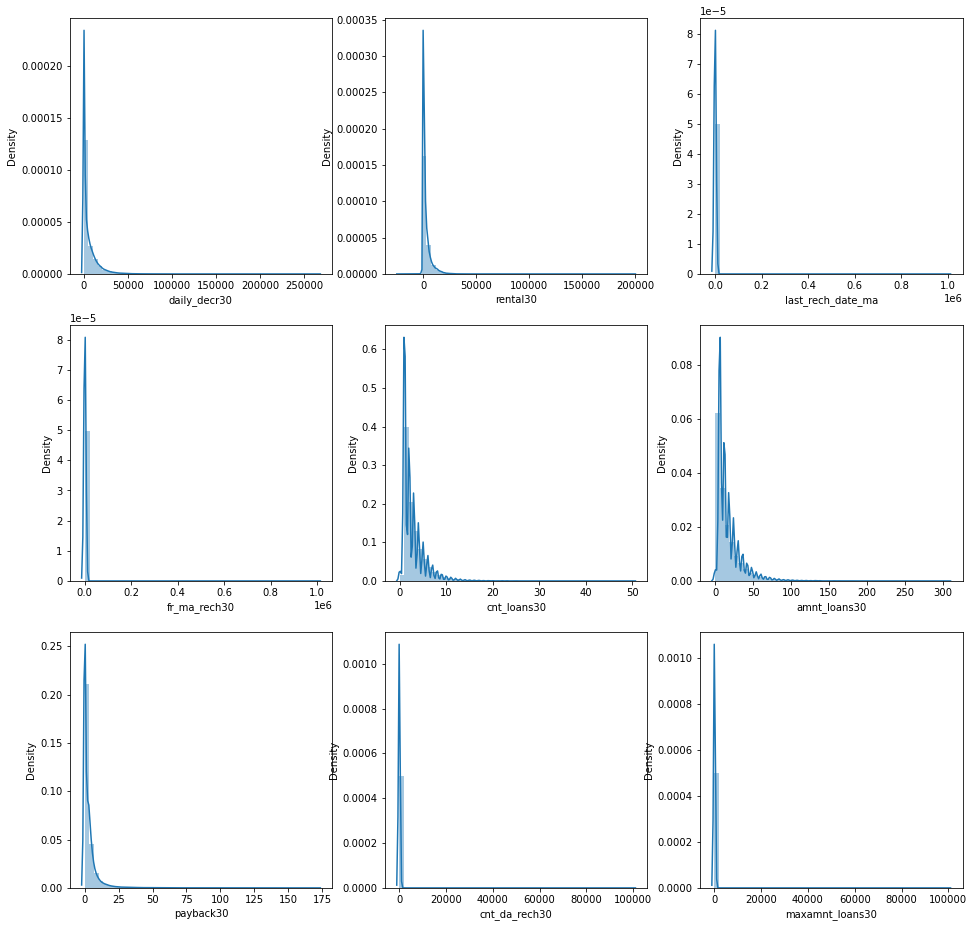

In [26]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df1['daily_decr30'],ax=ax2[0][0])
sns.distplot(df1['rental30'],ax=ax2[0][1])
sns.distplot(df1['last_rech_date_ma'],ax=ax2[0][2])
sns.distplot(df1['fr_ma_rech30'],ax=ax2[1][0])
sns.distplot(df1['cnt_loans30'],ax=ax2[1][1])
sns.distplot(df1['amnt_loans30'],ax=ax2[1][2])
sns.distplot(df1['payback30'],ax=ax2[2][0])
sns.distplot(df1['cnt_da_rech30'],ax=ax2[2][1])
sns.distplot(df1['maxamnt_loans30'],ax=ax2[2][2])

In [27]:
df1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='Density'>

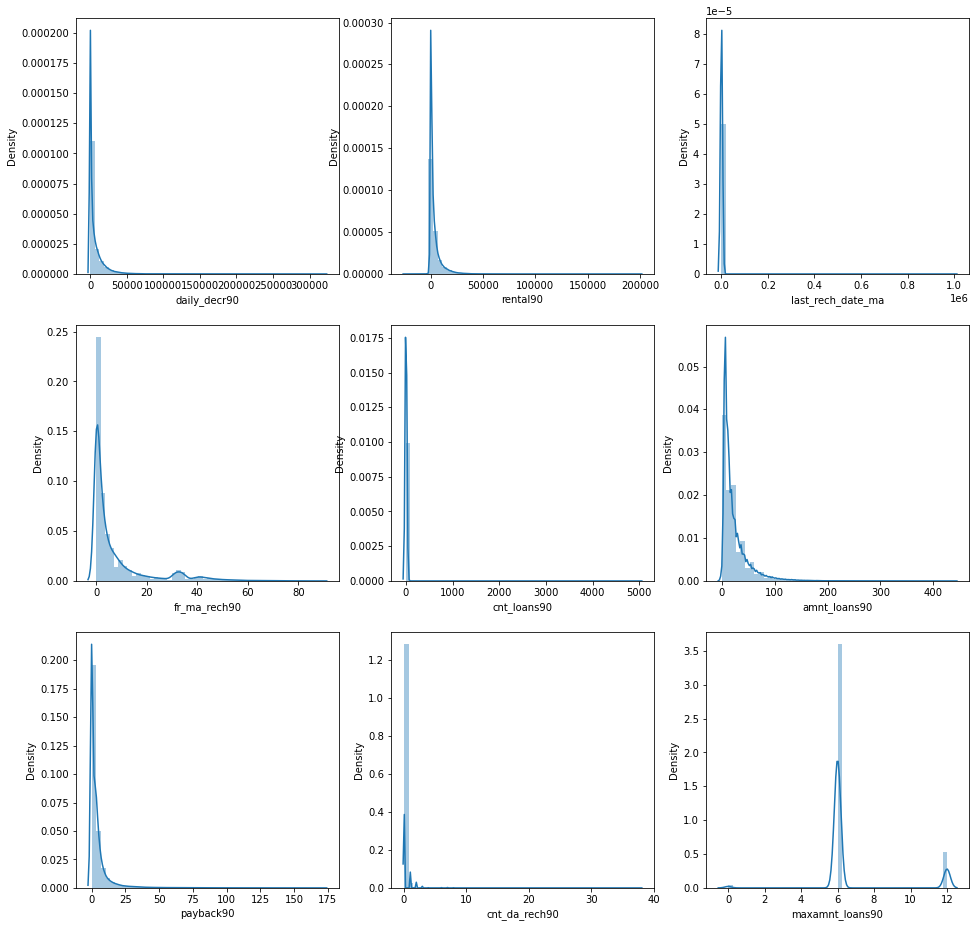

In [28]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df1['daily_decr90'],ax=ax2[0][0])
sns.distplot(df1['rental90'],ax=ax2[0][1])
sns.distplot(df1['last_rech_date_ma'],ax=ax2[0][2])
sns.distplot(df1['fr_ma_rech90'],ax=ax2[1][0])
sns.distplot(df1['cnt_loans90'],ax=ax2[1][1])
sns.distplot(df1['amnt_loans90'],ax=ax2[1][2])
sns.distplot(df1['payback90'],ax=ax2[2][0])
sns.distplot(df1['cnt_da_rech90'],ax=ax2[2][1])
sns.distplot(df1['maxamnt_loans90'],ax=ax2[2][2])


## These are the Machine Learning Models which will not Sensitive To Outliers/or robust to outliers and it handles outliers properly as well. But we also treat the outliers with IQR method and make a threshold to remove outlier.


 Decision Tree Regressor or Classifier         Not Sensitive
 Ensemble(RF,XGboost,GB)                       Not Sensitive
 KNN                                           Not Sensitive
 Naivye Bayes Classifier                       Not Sensitive To Outliers
 SVM                                           Not Sensitive To Outliers

# Visualizing the data for every features via box plot to gain insights about outliers for treatment of it.

Text(0, 0.5, 'label')

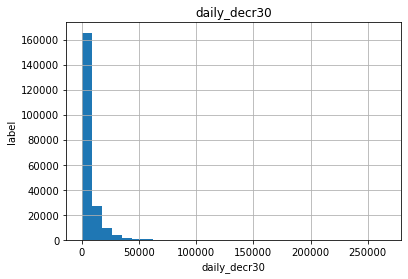

In [24]:
figure=df1.daily_decr30.hist(bins=30)
figure.set_title('daily_decr30')
figure.set_xlabel('daily_decr30')
figure.set_ylabel('label')

C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

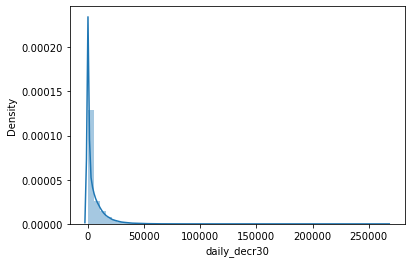

In [25]:
sns.distplot(df1['daily_decr30'])

count    209593.000000
mean       5381.402289
std        9220.623400
min         -93.012667
25%          42.440000
50%        1469.175667
75%        7244.000000
max      265926.000000
Name: daily_decr30, dtype: float64

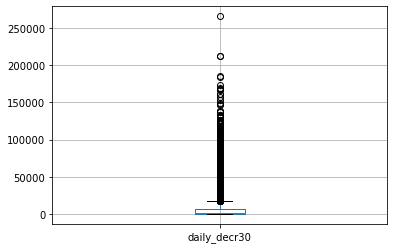

In [9]:
figure=df1.boxplot(column="daily_decr30")
df1['daily_decr30'].describe()

# Criteria to identify an outlier

### Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartil
### Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

In [10]:
# If The Data Is Normally Distributed We use this
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

#uppper_boundary=df1['daily_decr30'].mean() + 3* df1['daily_decr30'].std()
#lower_boundary=df1['daily_decr30'].mean() - 3* df1['daily_decr30'].std()
#print(lower_boundary), print(uppper_boundary),print(df1['daily_decr30'].mean())

# If Features are Skewed We Use the below Technique
##### Assuming daily_decr30 follows right skewed Distribution we will calculate the boundaries which differentiates the outliers

A left-skewed distribution has a long left tail. ... A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That's because there is a long tail in the positive direction on the number line

In [120]:
data=df1.copy()

In [121]:
#### Lets compute the Interquantile range to calculate the boundaries

IQR=data.daily_decr30.quantile(0.75)-data.daily_decr30.quantile(0.25)

In [122]:
lower_bridge=data['daily_decr30'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['daily_decr30'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-10759.9
18046.34


(None, None)

In [123]:
#### Extreme outliers
lower_bridge=data['daily_decr30'].quantile(0.25)-(IQR*3)
upper_bridge=data['daily_decr30'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-21562.24
28848.68


(None, None)

# Now we will take 18046.34 as a threshold value to treat outliers for this feature. WE will calculate threshold for all features as well.

In [124]:
data.loc[data['daily_decr30']>=18046.34,'daily_decr30']=18046.34
#data.loc[data['daily_decr30']>=28848.68,'Fare']=28848.68

Text(0, 0.5, 'label')

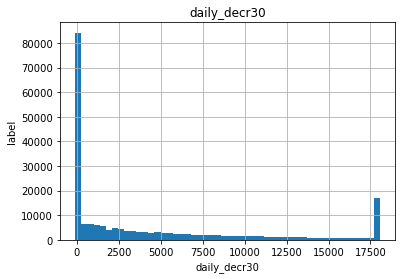

In [125]:
figure=data.daily_decr30.hist(bins=50)
figure.set_title('daily_decr30')
figure.set_xlabel('daily_decr30')
figure.set_ylabel('label')

count    209593.000000
mean       6082.515068
std       10918.812767
min         -93.012667
25%          42.692000
50%        1500.000000
75%        7802.790000
max      320630.000000
Name: daily_decr90, dtype: float64

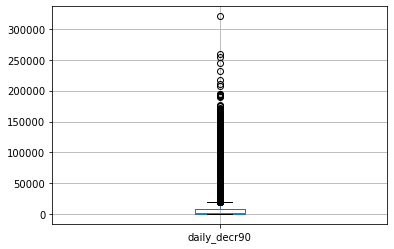

In [126]:
figure=data.boxplot(column="daily_decr90")
data['daily_decr90'].describe()

In [127]:
IQR=data.daily_decr90.quantile(0.75)-data.daily_decr90.quantile(0.25)
lower_bridge=data['daily_decr90'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['daily_decr90'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-11597.455000000016
19442.937000000027


(None, None)

In [128]:
data.loc[data['daily_decr90']>=19442.93,'daily_decr90']=19442.93

count    209593.000000
mean       2692.581910
std        4308.586781
min      -23737.140000
25%         280.420000
50%        1083.570000
75%        3356.940000
max      198926.110000
Name: rental30, dtype: float64

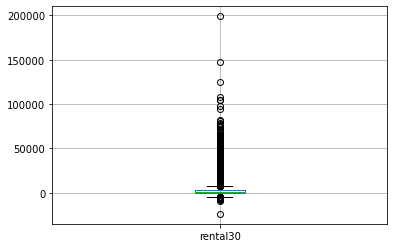

In [129]:
figure=data.boxplot(column="rental30")
data['rental30'].describe()

count    209593.000000
mean       3483.406534
std        5770.461279
min      -24720.580000
25%         300.260000
50%        1334.000000
75%        4201.790000
max      200148.110000
Name: rental90, dtype: float64

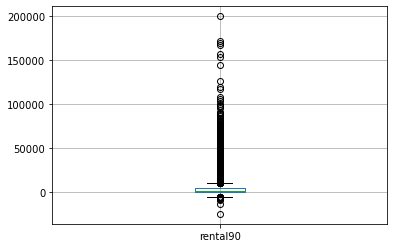

In [130]:
figure=data.boxplot(column="rental90")
data['rental90'].describe()

In [131]:
IQR=data.rental90.quantile(0.75)-data.rental90.quantile(0.25)
lower_bridge=data['rental90'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['rental90'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-5552.035
10054.085


(None, None)

In [132]:
data.loc[data['rental90']>=10054.085,'rental90']=10054.085

count    209593.000000
mean       3755.847800
std       53905.892230
min         -29.000000
25%           1.000000
50%           3.000000
75%           7.000000
max      998650.377733
Name: last_rech_date_ma, dtype: float64

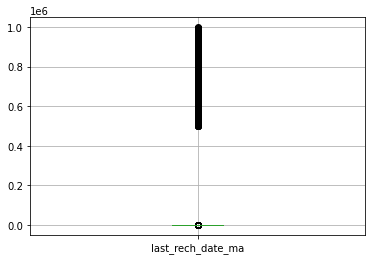

In [133]:
figure=data.boxplot(column= "last_rech_date_ma")
data["last_rech_date_ma"].describe()


In [134]:
IQR=data.last_rech_date_ma.quantile(0.75)-data.last_rech_date_ma.quantile(0.25)
lower_bridge=data['last_rech_date_ma'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['last_rech_date_ma'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-8.0
16.0


(None, None)

In [135]:
data.loc[data['last_rech_date_ma']>=116.0,'last_rech_date_ma']=16.0

count    209593.000000
mean       3712.202921
std       53374.833430
min         -29.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999171.809410
Name: last_rech_date_da, dtype: float64

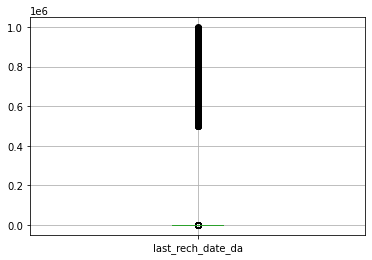

In [136]:
figure=data.boxplot(column="last_rech_date_da")
data['last_rech_date_da'].describe()

In [137]:
IQR=data.last_rech_date_da.quantile(0.75)-data.last_rech_date_da.quantile(0.25)
lower_bridge=data['last_rech_date_da'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['last_rech_date_da'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.0
0.0


(None, None)

In [138]:
data.loc[data['last_rech_date_da']>=0,'last_rech_date_da']=0

count    209593.000000
mean       2064.452797
std        2370.786034
min           0.000000
25%         770.000000
50%        1539.000000
75%        2309.000000
max       55000.000000
Name: last_rech_amt_ma, dtype: float64

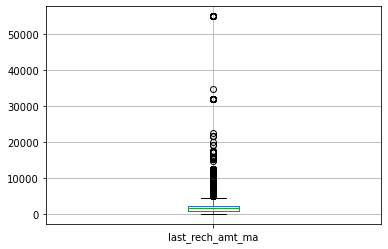

In [139]:
figure=data.boxplot(column="last_rech_amt_ma")
data['last_rech_amt_ma'].describe()

In [140]:
IQR=data.last_rech_amt_ma.quantile(0.75)-data.last_rech_amt_ma.quantile(0.25)
lower_bridge=data['last_rech_amt_ma'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['last_rech_amt_ma'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-1538.5
4617.5


(None, None)

In [141]:
data.loc[data['last_rech_amt_ma']>=4617.5,'last_rech_amt_ma']=4617.5

count    209593.000000
mean          3.978057
std           4.256090
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max         203.000000
Name: cnt_ma_rech30, dtype: float64

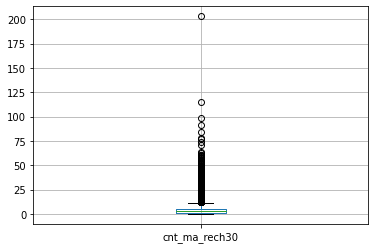

In [142]:
figure=data.boxplot(column="cnt_ma_rech30")
data['cnt_ma_rech30'].describe()

In [143]:
IQR=data.cnt_ma_rech30.quantile(0.75)-data.cnt_ma_rech30.quantile(0.25)
lower_bridge=data['cnt_ma_rech30'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['cnt_ma_rech30'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-5.0
11.0


(None, None)

In [144]:
data.loc[data['cnt_ma_rech30']>=11.0,'cnt_ma_rech30']=11.0

count    209593.000000
mean       3737.355121
std       53643.625172
min           0.000000
25%           0.000000
50%           2.000000
75%           6.000000
max      999606.368132
Name: fr_ma_rech30, dtype: float64

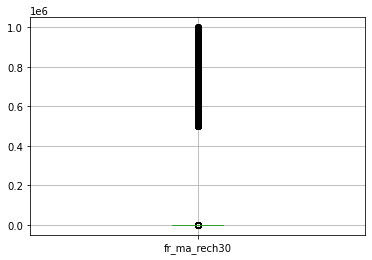

In [145]:
figure=data.boxplot(column="fr_ma_rech30")
data['fr_ma_rech30'].describe()

In [146]:
IQR=data.fr_ma_rech30.quantile(0.75)-data.fr_ma_rech30.quantile(0.25)
lower_bridge=data['fr_ma_rech30'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['fr_ma_rech30'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-9.0
15.0


(None, None)

In [147]:
data.loc[data['fr_ma_rech30']>=15.0,'fr_ma_rech30']=15.0

count    209593.000000
mean       7704.501157
std       10139.621714
min           0.000000
25%        1540.000000
50%        4628.000000
75%       10010.000000
max      810096.000000
Name: sumamnt_ma_rech30, dtype: float64

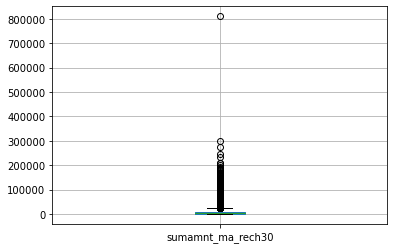

In [148]:
figure=data.boxplot(column="sumamnt_ma_rech30")
data['sumamnt_ma_rech30'].describe()

In [149]:
IQR=data.sumamnt_ma_rech30.quantile(0.75)-data.sumamnt_ma_rech30.quantile(0.25)
lower_bridge=data['sumamnt_ma_rech30'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['sumamnt_ma_rech30'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-11165.0
22715.0


(None, None)

In [150]:
data.loc[data['sumamnt_ma_rech30']>=22715.0,'sumamnt_ma_rech30']=22715.0

count    209593.000000
mean       1812.817952
std        2070.864620
min           0.000000
25%         770.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech30, dtype: float64

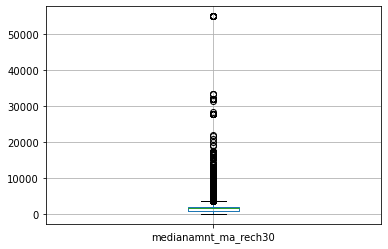

In [151]:
figure=data.boxplot(column="medianamnt_ma_rech30")
data['medianamnt_ma_rech30'].describe()

In [152]:
IQR=data.medianamnt_ma_rech30.quantile(0.75)-data.medianamnt_ma_rech30.quantile(0.25)
lower_bridge=data['medianamnt_ma_rech30'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['medianamnt_ma_rech30'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-961.0
3655.0


(None, None)

In [153]:
data.loc[data['medianamnt_ma_rech30']>=3655.0,'medianamnt_ma_rech30']=3655.0

count    209593.00000
mean          6.31543
std           7.19347
min           0.00000
25%           2.00000
50%           4.00000
75%           8.00000
max         336.00000
Name: cnt_ma_rech90, dtype: float64

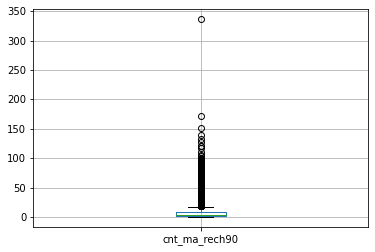

In [154]:
figure=data.boxplot(column="cnt_ma_rech90")
data["cnt_ma_rech90"].describe()

In [155]:
IQR=data.cnt_ma_rech90.quantile(0.75)-data.cnt_ma_rech90.quantile(0.25)
lower_bridge=data['cnt_ma_rech90'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['cnt_ma_rech90'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-7.0
17.0


(None, None)

In [156]:
data.loc[data['cnt_ma_rech90']>=17,'cnt_ma_rech90']=17

In [157]:
df1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

count    209593.000000
mean       3851.927942
std       54006.374433
min        -200.000000
25%          11.000000
50%          33.900000
75%          83.000000
max      999479.419319
Name: medianmarechprebal30, dtype: float64

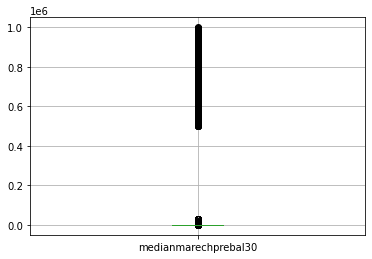

In [158]:
figure=df1.boxplot(column="medianmarechprebal30")
df1["medianmarechprebal30"].describe()

In [159]:
IQR=data.medianamnt_ma_rech30.quantile(0.75)-data.medianamnt_ma_rech30.quantile(0.25)
lower_bridge=data['medianmarechprebal30'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['medianmarechprebal30'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-1720.0
1814.0


(None, None)

In [160]:
data.loc[data['medianmarechprebal30']>=1814.0,'medianmarechprebal30']=1814.0

count    209593.000000
mean          7.716780
std          12.590251
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max          88.000000
Name: fr_ma_rech90, dtype: float64

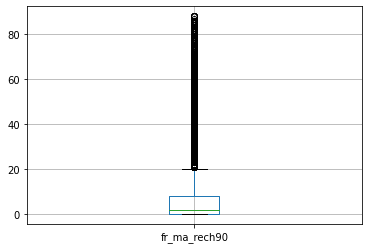

In [161]:
figure=data.boxplot(column="fr_ma_rech90")
data["fr_ma_rech90"].describe()

In [162]:
IQR=data.fr_ma_rech90.quantile(0.75)-data.fr_ma_rech90.quantile(0.25)
lower_bridge=data['fr_ma_rech90'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['fr_ma_rech90'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-12.0
20.0


(None, None)

In [163]:
data.loc[data['fr_ma_rech90']>=20.0,'fr_ma_rech90']=20.0

count    209593.000000
mean      12396.218352
std       16857.793882
min           0.000000
25%        2317.000000
50%        7226.000000
75%       16000.000000
max      953036.000000
Name: sumamnt_ma_rech90, dtype: float64

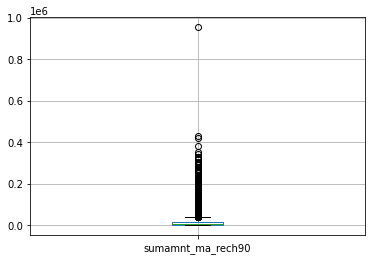

In [164]:
figure=data.boxplot(column="sumamnt_ma_rech90")
data["sumamnt_ma_rech90"].describe()

In [165]:
IQR=data.sumamnt_ma_rech90.quantile(0.75)-data.sumamnt_ma_rech90.quantile(0.25)
lower_bridge=data['sumamnt_ma_rech90'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['sumamnt_ma_rech90'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-18207.5
36524.5


(None, None)

In [166]:
data.loc[data['sumamnt_ma_rech90']>=36524.5,'sumamnt_ma_rech90']=36524.5

count    209593.000000
mean       1864.595821
std        2081.680664
min           0.000000
25%         773.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech90, dtype: float64

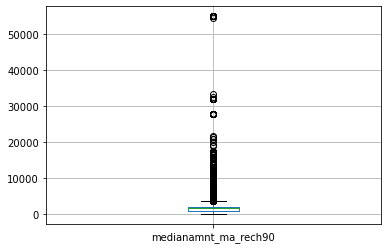

In [167]:
figure=data.boxplot(column="medianamnt_ma_rech90")
data["medianamnt_ma_rech90"].describe()

In [168]:
IQR=data.medianamnt_ma_rech90.quantile(0.75)-data.medianamnt_ma_rech90.quantile(0.25)
lower_bridge=data['medianamnt_ma_rech90'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['medianamnt_ma_rech90'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-953.5
3650.5


(None, None)

In [169]:
data.loc[data['medianamnt_ma_rech90']>=3650.5,'medianamnt_ma_rech90']=3650.5

count    209593.000000
mean        262.578110
std        4183.897978
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99914.441420
Name: cnt_da_rech30, dtype: float64

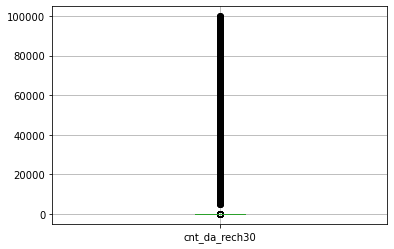

In [170]:
figure=data.boxplot(column="cnt_da_rech30")
data["cnt_da_rech30"].describe()

In [171]:
IQR=data.cnt_da_rech30.quantile(0.75)-data.cnt_da_rech30.quantile(0.25)
lower_bridge=data['cnt_da_rech30'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['cnt_da_rech30'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.0
0.0


(None, None)

In [172]:
data.loc[data['medianmarechprebal30']>=0,'medianmarechprebal30']=0

count    209593.000000
mean       3749.494447
std       53885.414979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999809.240107
Name: fr_da_rech30, dtype: float64

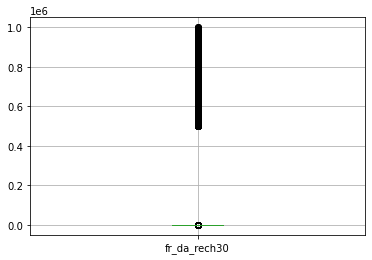

In [173]:
figure=data.boxplot(column="fr_da_rech30")
data["fr_da_rech30"].describe()

In [174]:
IQR=data.fr_da_rech30.quantile(0.75)-data.fr_da_rech30.quantile(0.25)
lower_bridge=data['fr_da_rech30'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['fr_da_rech30'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.0
0.0


(None, None)

In [175]:
data.loc[data['fr_da_rech30']>=0,'fr_da_rech30']=0

count    209593.000000
mean          0.041495
std           0.397556
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          38.000000
Name: cnt_da_rech90, dtype: float64

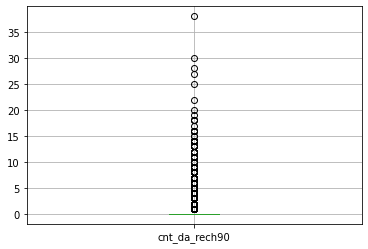

In [176]:
figure=data.boxplot(column="cnt_da_rech90")
data["cnt_da_rech90"].describe()

In [177]:
IQR=data.cnt_da_rech90.quantile(0.75)-data.cnt_da_rech90.quantile(0.25)
lower_bridge=data['cnt_da_rech90'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['cnt_da_rech90'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.0
0.0


(None, None)

In [178]:
data.loc[data['cnt_da_rech90']>=0,'cnt_da_rech90']=0

count    209593.000000
mean          0.045712
std           0.951386
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          64.000000
Name: fr_da_rech90, dtype: float64

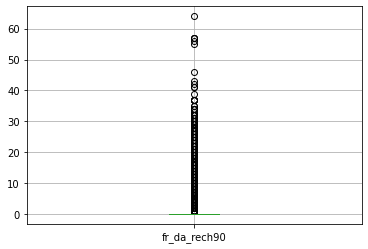

In [179]:
figure=data.boxplot(column="fr_da_rech90")
data["fr_da_rech90"].describe()

In [180]:
IQR=data.fr_da_rech90.quantile(0.75)-data.fr_da_rech90.quantile(0.25)
lower_bridge=data['fr_da_rech90'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['fr_da_rech90'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.0
0.0


(None, None)

In [181]:
data.loc[data['fr_da_rech90']>=0,'fr_da_rech90']=0

count    209593.000000
mean          2.758981
std           2.554502
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          50.000000
Name: cnt_loans30, dtype: float64

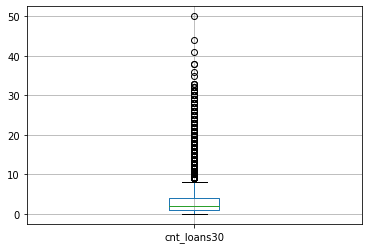

In [182]:
figure=data.boxplot(column="cnt_loans30")
data["cnt_loans30"].describe()

In [183]:
IQR=data.cnt_loans30.quantile(0.75)-data.cnt_loans30.quantile(0.25)
lower_bridge=data['cnt_loans30'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['cnt_loans30'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-3.5
8.5


(None, None)

In [184]:
data.loc[data['cnt_loans30']>=8.5,'cnt_loans30']=8.5

count    209593.000000
mean         17.952021
std          17.379741
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max         306.000000
Name: amnt_loans30, dtype: float64

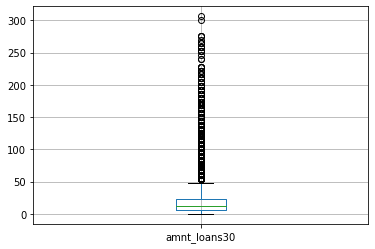

In [185]:
figure=data.boxplot(column="amnt_loans30")
data["amnt_loans30"].describe()

In [186]:
IQR=data.amnt_loans30.quantile(0.75)-data.amnt_loans30.quantile(0.25)
lower_bridge=data['amnt_loans30'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['amnt_loans30'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-21.0
51.0


(None, None)

In [187]:
data.loc[data['amnt_loans30']>=51.0,'amnt_loans30']=51.0

count    209593.000000
mean        274.658747
std        4245.264648
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       99864.560864
Name: maxamnt_loans30, dtype: float64

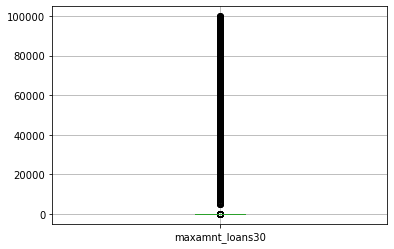

In [188]:
figure=data.boxplot(column="maxamnt_loans30")
data["maxamnt_loans30"].describe()

In [189]:
IQR=data.maxamnt_loans30.quantile(0.75)-data.maxamnt_loans30.quantile(0.25)
lower_bridge=data['maxamnt_loans30'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['maxamnt_loans30'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

6.0
6.0


(None, None)

In [190]:
data.loc[data['maxamnt_loans30']>=6.0,'maxamnt_loans30']=6.0

count    209593.000000
mean          0.054029
std           0.218039
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: medianamnt_loans30, dtype: float64

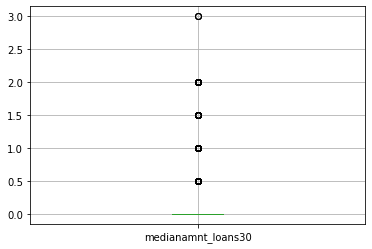

In [191]:
figure=data.boxplot(column="medianamnt_loans30")
data["medianamnt_loans30"].describe()

In [192]:
IQR=data.medianamnt_loans30.quantile(0.75)-data.medianamnt_loans30.quantile(0.25)
lower_bridge=data['medianamnt_loans30'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['medianamnt_loans30'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

0.0
0.0


(None, None)

In [193]:
data.loc[data['medianamnt_loans30']>=0,'medianamnt_loans30']=0

count    209593.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: medianamnt_loans30, dtype: float64

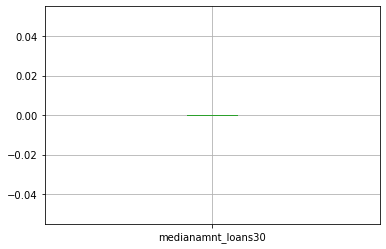

In [194]:
figure=data.boxplot(column="medianamnt_loans30")
data["medianamnt_loans30"].describe()

count    209593.000000
mean         18.520919
std         224.797423
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        4997.517944
Name: cnt_loans90, dtype: float64

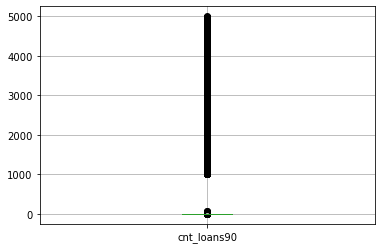

In [195]:
figure=data.boxplot(column="cnt_loans90")
data["cnt_loans90"].describe()

In [196]:
IQR=data.cnt_loans90.quantile(0.75)-data.cnt_loans90.quantile(0.25)
lower_bridge=data['cnt_loans90'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['cnt_loans90'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-5.0
11.0


(None, None)

In [197]:
data.loc[data['cnt_loans90']>=11.0,'cnt_loans90']=11.0

count    209593.000000
mean         23.645398
std          26.469861
min           0.000000
25%           6.000000
50%          12.000000
75%          30.000000
max         438.000000
Name: amnt_loans90, dtype: float64

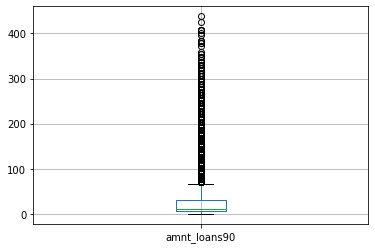

In [198]:
figure=data.boxplot(column="amnt_loans90")
data["amnt_loans90"].describe()

In [199]:
IQR=data.amnt_loans90.quantile(0.75)-data.amnt_loans90.quantile(0.25)
lower_bridge=data['amnt_loans90'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['amnt_loans90'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-30.0
66.0


(None, None)

In [200]:
data.loc[data['amnt_loans90']>=66.0,'amnt_loans90']=66.0

count    209593.000000
mean          6.703134
std           2.103864
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max          12.000000
Name: maxamnt_loans90, dtype: float64

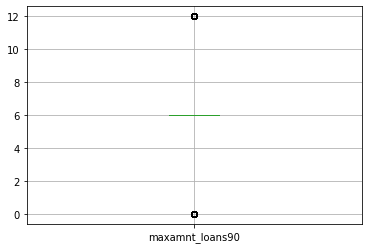

In [201]:
figure=data.boxplot(column="maxamnt_loans90")
data["maxamnt_loans90"].describe()

In [202]:
IQR=data.maxamnt_loans90.quantile(0.75)-data.maxamnt_loans90.quantile(0.25)
lower_bridge=data['maxamnt_loans90'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['maxamnt_loans90'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

6.0
6.0


(None, None)

In [203]:
data.loc[data['maxamnt_loans90']>=6.0,'maxamnt_loans90']=6.0

count    209593.000000
mean          0.046077
std           0.200692
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: medianamnt_loans90, dtype: float64

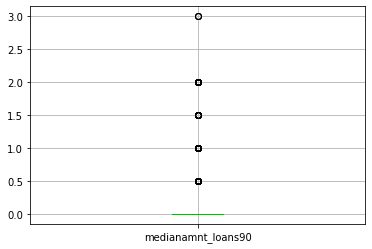

In [204]:
figure=data.boxplot(column="medianamnt_loans90")
data["medianamnt_loans90"].describe()

count    209593.000000
mean          3.398826
std           8.813729
min           0.000000
25%           0.000000
50%           0.000000
75%           3.750000
max         171.500000
Name: payback30, dtype: float64

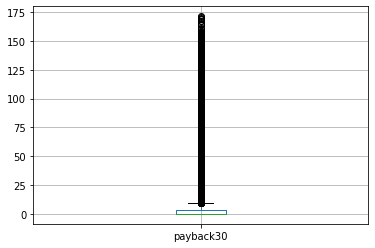

In [205]:
figure=data.boxplot(column="payback30")
data["payback30"].describe()

In [206]:
IQR=data.payback30.quantile(0.75)-data.payback30.quantile(0.25)
lower_bridge=data['payback30'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['payback30'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-5.625
9.375


(None, None)

In [207]:
data.loc[data['payback30']>=9.375,'payback30']=9.375

count    209593.000000
mean          4.321485
std          10.308108
min           0.000000
25%           0.000000
50%           1.666667
75%           4.500000
max         171.500000
Name: payback90, dtype: float64

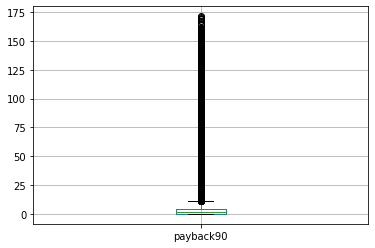

In [208]:
figure=data.boxplot(column="payback90")
data["payback90"].describe()

In [209]:
IQR=data.payback90.quantile(0.75)-data.payback90.quantile(0.25)
lower_bridge=data['payback90'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['payback90'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-6.75
11.25


(None, None)

In [210]:
data.loc[data['payback90']>=11.25,'payback90']=11.25


In [211]:
print('Number of outliers in payback90 upper : ', data[data['payback90']>11.25]['payback90'].count())
print('Number of outliers in payback90 lower : ', data[data['payback90']<-6.75]['payback90'].count())

Number of outliers in payback90 upper :  0
Number of outliers in payback90 lower :  0


C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


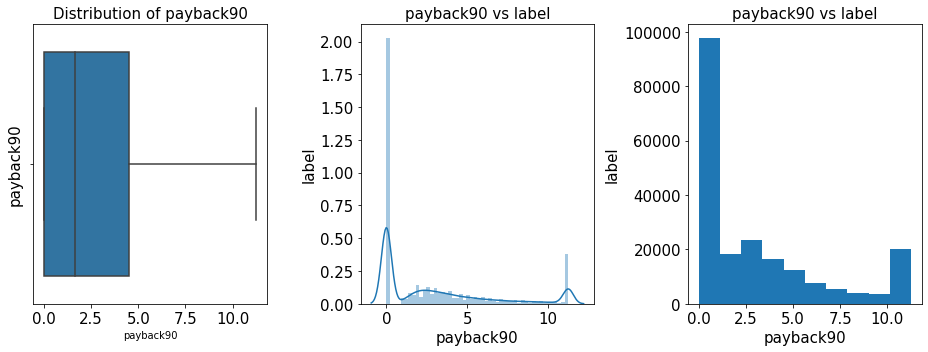

In [212]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='payback90',data=data,orient='v',ax=ax1)
ax1.set_ylabel('payback90', fontsize=15)
ax1.set_title('Distribution of payback90', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['payback90'],ax=ax2)
ax2.set_xlabel('payback90', fontsize=15)
ax2.set_ylabel('label', fontsize=15)
ax2.set_title('payback90 vs label', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['payback90'])
ax3.set_xlabel('payback90', fontsize=15)
ax3.set_ylabel('label', fontsize=15)
ax3.set_title('payback90 vs label', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


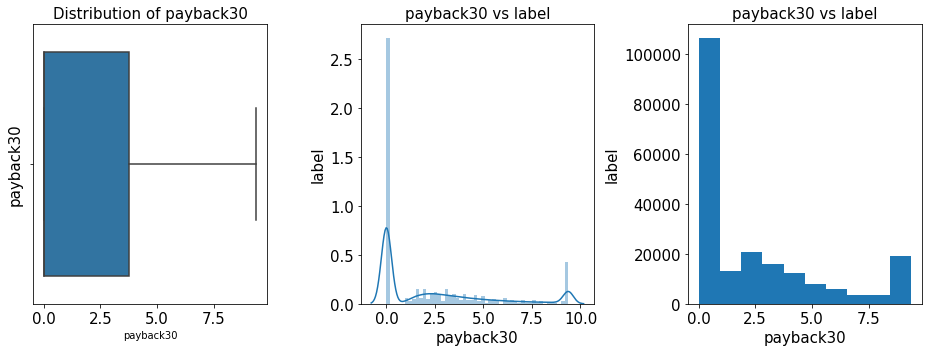

In [213]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='payback30',data=data,orient='v',ax=ax1)
ax1.set_ylabel('payback30', fontsize=15)
ax1.set_title('Distribution of payback30', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['payback30'],ax=ax2)
ax2.set_xlabel('payback30', fontsize=15)
ax2.set_ylabel('label', fontsize=15)
ax2.set_title('payback30 vs label', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['payback30'])
ax3.set_xlabel('payback30', fontsize=15)
ax3.set_ylabel('label', fontsize=15)
ax3.set_title('payback30 vs label', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Get independent and dependent/target features and Split the dataset into train and test set in the ratio of 70:30 respectively.

In [214]:
X = data.drop(['label'], axis=1)
y = data['label']

In [110]:
X.count()

aon                     209593
daily_decr30            209593
daily_decr90            209593
rental30                209593
rental90                209593
last_rech_date_ma       209593
last_rech_date_da       209593
last_rech_amt_ma        209593
cnt_ma_rech30           209593
fr_ma_rech30            209593
sumamnt_ma_rech30       209593
medianamnt_ma_rech30    209593
medianmarechprebal30    209593
cnt_ma_rech90           209593
fr_ma_rech90            209593
sumamnt_ma_rech90       209593
medianamnt_ma_rech90    209593
medianmarechprebal90    209593
cnt_da_rech30           209593
fr_da_rech30            209593
cnt_da_rech90           209593
fr_da_rech90            209593
cnt_loans30             209593
amnt_loans30            209593
maxamnt_loans30         209593
medianamnt_loans30      209593
cnt_loans90             209593
amnt_loans90            209593
maxamnt_loans90         209593
medianamnt_loans90      209593
payback30               209593
payback90               209593
dtype: i

# Split the dataset

In [106]:
#Split the dataset

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=5)
X_train.count()

aon                     146715
daily_decr30            146715
daily_decr90            146715
rental30                146715
rental90                146715
last_rech_date_ma       146715
last_rech_date_da       146715
last_rech_amt_ma        146715
cnt_ma_rech30           146715
fr_ma_rech30            146715
sumamnt_ma_rech30       146715
medianamnt_ma_rech30    146715
medianmarechprebal30    146715
cnt_ma_rech90           146715
fr_ma_rech90            146715
sumamnt_ma_rech90       146715
medianamnt_ma_rech90    146715
medianmarechprebal90    146715
cnt_da_rech30           146715
fr_da_rech30            146715
cnt_da_rech90           146715
fr_da_rech90            146715
cnt_loans30             146715
amnt_loans30            146715
maxamnt_loans30         146715
medianamnt_loans30      146715
cnt_loans90             146715
amnt_loans90            146715
maxamnt_loans90         146715
medianamnt_loans90      146715
payback30               146715
payback90               146715
dtype: i

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=5)
X_test.count()

aon                     62878
daily_decr30            62878
daily_decr90            62878
rental30                62878
rental90                62878
last_rech_date_ma       62878
last_rech_date_da       62878
last_rech_amt_ma        62878
cnt_ma_rech30           62878
fr_ma_rech30            62878
sumamnt_ma_rech30       62878
medianamnt_ma_rech30    62878
medianmarechprebal30    62878
cnt_ma_rech90           62878
fr_ma_rech90            62878
sumamnt_ma_rech90       62878
medianamnt_ma_rech90    62878
medianmarechprebal90    62878
cnt_da_rech30           62878
fr_da_rech30            62878
cnt_da_rech90           62878
fr_da_rech90            62878
cnt_loans30             62878
amnt_loans30            62878
maxamnt_loans30         62878
medianamnt_loans30      62878
cnt_loans90             62878
amnt_loans90            62878
maxamnt_loans90         62878
medianamnt_loans90      62878
payback30               62878
payback90               62878
dtype: int64

## # To scale the dimensions we need scale function which is part of scikit preprocessing libraries

### from sklearn.preprocessing import StandardScaler, MinMaxScaler
### data_scaled=MinMaxScaler().fit_transform(data)
### data_scaled=pd.DataFrame(data=data_scaled, columns=data.columns) /// we can use this also for Normalization (To get value b/w 0 and 1)

In [113]:
from sklearn import preprocessing
from scipy.stats import zscore

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)


# These are the Machine Learning Models which will not Sensitive To Outliers/or robust to outliers and it handles outliers properly.


### Decision Tree Regressor or Classifier         Not Sensitive
### Ensemble(RF,XGboost,GB)                           Not Sensitive
### KNN                                                                 Not Sensitive
### Naivye Bayes Classifier                                Not Sensitive To Outliers
### SVM                                                                 Not Sensitive To Outliers

### Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data without upsampling and feature extraction or dimensionality reduction.

### Let's do this experiment, using simple cross-validation and no feature engineering:

# Logistic Regression Model
### Cross validation helper function

In [114]:
from sklearn.model_selection import cross_val_score

def CrossVal(X_train_scaled,y,mode,cv=3):
    score=cross_val_score(mode,X_train_scaled , y, cv=cv, scoring='accuracy')
    return(np.mean(score))

In [115]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    

In [269]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

In [270]:
print('Train score: {}'.format(logreg.score(X_train_scaled, y_train) * 100))
print('Test score: {}'.format(logreg.score(X_test_scaled, y_test) * 100))

Train score: 87.86763452953004
Test score: 87.7190750341932


In [271]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[  640  7284]
 [  438 54516]]


In [272]:
accuracies = {}
acc_logreg = logreg.score(X_test_scaled, y_test) * 100
accuracies['Logistic Regression'] = acc_logreg
print("Logistic Regression Accuracy: {}".format(acc_logreg))

Logistic Regression Accuracy: 87.7190750341932


# Inference:-
#### Test Accuracy of Logistic Regression Algorithm is 87.72

# Naive Bayes theorem

In [273]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [274]:
predicted = nb.predict(X_test_scaled)
print(metrics.classification_report(y_test, predicted))          
print('Total accuracy:', np.round(metrics.accuracy_score(y_test, predicted),2))    

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7924
           1       0.87      1.00      0.93     54954

    accuracy                           0.87     62878
   macro avg       0.44      0.50      0.47     62878
weighted avg       0.76      0.87      0.82     62878

Total accuracy: 0.87


C:\Users\Ganesh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [275]:
print('Train score: {}'.format(nb.score(X_train_scaled, y_train) * 100))
print('Test score: {}'.format(nb.score(X_test_scaled, y_test) * 100))

Train score: 39.76485021981392
Test score: 87.39781799675562


In [276]:
print(metrics.confusion_matrix(y_test,predicted))

[[    0  7924]
 [    0 54954]]


In [277]:
acc_nb = nb.score(X_test_scaled, y_test) * 100
accuracies['Naive Bayes'] = acc_nb
print("Naive Bayes Accuracy: {}".format(acc_nb))

Naive Bayes Accuracy: 87.39781799675562


## Inference:-
#### Test Accuracy of Naive Bayes Algorithm is 87.40

Text(0.5, 1.0, 'F1 Score = 0.9327517143051124')

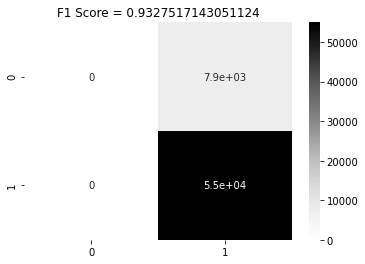

In [278]:
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,nb.predict(X_test_scaled)), annot= True, cmap='Greys')
nb_f1=f1_score(y_test,nb.predict(X_test_scaled))  
plt.title('F1 Score = {}'.format(nb_f1))


# Inference 

### One of the major issues that novice users fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.


## F1 score is the best to this type of model evaluation for classification problem which have count precision and recall both. Here F1 score is 93% but if we have accuracy score more than 98% then we sometime use this also.

# XGBoost Classifier

In [279]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\Ganesh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 87.87%


C:\Users\Ganesh\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Text(0.5, 1.0, 'F1 Score = 0.9345324420111387')

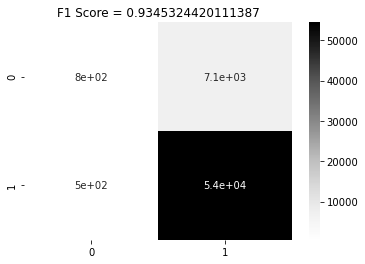

In [280]:
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,xgb_model.predict(X_test_scaled)), annot= True, cmap='Greys')
nb_f1=f1_score(y_test,xgb_model.predict(X_test_scaled))  
plt.title('F1 Score = {}'.format(nb_f1))


# Inference 
## F1 score is the best to this type of model evaluation for classification problem which have count precision and recall both. Here F1 score is 93.45%.

# Support Vector Machines (SVM)

In [297]:
from sklearn import svm
svm = svm.SVC(gamma = 0.025, C = 3)
svm.fit(X_train_scaled, y_train)

SVC(C=3, gamma=0.025)

In [298]:
svm.score(X_test_scaled, y_test) 

0.8791628232450142

In [299]:
y_pred = svm.predict(X_test_scaled)

print('Train score: {}'.format(svm.score(X_train_scaled, y_train) * 100))
print('Test score: {}'.format(svm.score(X_test_scaled, y_test) * 100))

Train score: 88.18048597621238
Test score: 87.91628232450141


In [300]:
acc_svm = svm.score(X_test_scaled, y_test) * 100
accuracies['SVM'] = acc_svm

In [301]:
print(metrics.confusion_matrix(y_test, y_pred))

[[  657  7267]
 [  331 54623]]


# Inference:-
### Test Accuracy of Support Vector Machines Algorithm is 87.92

# KNN model

The optimal number of neighbors is 9


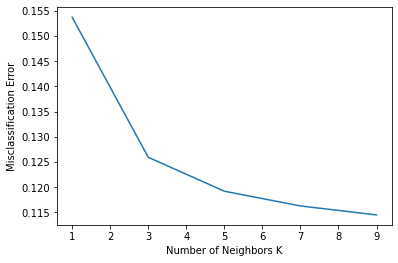

In [282]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate


# creating odd list of K for KNN
myList = list(range(1,10))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # predict the response
    y_pred = knn.predict(X_test_scaled)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)


# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)


plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [283]:
#the above graph sometimes shows 3,5 7,9 and sometimes 1 however as 1 is the right answer hence used it below.
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')

In [284]:
X_z = X.apply(zscore)
X_z.describe()

C:\Users\Ganesh\anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,2.095930e+05,2.095930e+05,2.095930e+05,2.095930e+05,2.095930e+05,2.095930e+05,2.095930e+05,2.095930e+05,2.095930e+05,2.095930e+05,...,2.095930e+05,2.095930e+05,2.095930e+05,0.0,2.095930e+05,2.095930e+05,2.095930e+05,2.095930e+05,2.095930e+05,2.095930e+05
mean,-1.158927e-17,-7.466177e-17,-5.624749e-16,-3.408250e-16,-3.443411e-16,9.400894e-16,1.228969e-15,3.651357e-16,9.947904e-16,-1.160878e-15,...,-1.166785e-16,-3.951177e-16,-4.324749e-16,NaN,6.713678e-16,3.550340e-16,2.037003e-15,4.533210e-15,-1.545005e-15,2.316397e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,NaN,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.078043e-01,-7.784291e-01,-7.685800e-01,-6.134212e+00,-8.452658e+00,-3.633232e+00,-2.034361e+02,-1.277347e+00,-1.151311e+00,-7.968187e-01,...,-1.264609e+00,-1.273760e+00,-7.975552e+00,NaN,-1.140095e+00,-1.157611e+00,-1.007923e+01,-2.295937e-01,-7.588390e-01,-7.967373e-01
25%,-1.039203e-01,-7.553119e-01,-7.475020e-01,-5.598512e-01,-7.590892e-01,-5.210025e-01,6.593765e-03,-7.052151e-01,-8.387163e-01,-7.968187e-01,...,-7.859268e-01,-8.205243e-01,1.253832e-01,NaN,-8.095355e-01,-8.334003e-01,9.921397e-02,-2.295937e-01,-7.588390e-01,-7.967373e-01
50%,-1.002081e-01,-5.118162e-01,-5.211487e-01,-3.734440e-01,-4.412281e-01,-3.135206e-01,6.593765e-03,-1.338262e-01,-2.135274e-01,-3.628264e-01,...,-3.072448e-01,-3.672888e-01,1.253832e-01,NaN,-4.789765e-01,-5.091898e-01,9.921397e-02,-2.295937e-01,-7.588390e-01,-3.379168e-01
75%,-9.419722e-02,4.737517e-01,4.578186e-01,1.541943e-01,4.405783e-01,1.014434e-01,6.593765e-03,4.383057e-01,4.116616e-01,5.051582e-01,...,6.501191e-01,5.391824e-01,1.253832e-01,NaN,5.127006e-01,4.634415e-01,9.921397e-02,-2.295937e-01,4.785185e-01,4.420781e-01
max,1.310175e+01,2.317347e+00,2.265798e+00,4.554486e+01,2.240080e+00,1.109799e+01,6.593765e-03,2.153587e+00,2.287229e+00,2.458124e+00,...,2.804188e+00,2.578742e+00,1.253832e-01,NaN,2.496055e+00,2.408704e+00,9.921397e-02,1.471875e+01,2.334555e+00,2.300301e+00


In [285]:
X = np.array(X_z)
y = np.array(y)

In [286]:
print(X.shape)
print(y.shape)

(209593, 32)
(209593,)


In [287]:
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
knn.score(X_test_scaled, y_test)

0.8450968542256433

In [288]:
print('Train score: {}'.format(knn.score(X_train_scaled, y_train) * 100))
print('Test score: {}'.format(knn.score(X_test_scaled, y_test) * 100))

Train score: 99.96046757318611
Test score: 84.50968542256433


# Model accuracy

In [289]:
cm_knn = print(metrics.confusion_matrix(y_test, y_pred))
cm_knn 

[[ 2545  5379]
 [ 4361 50593]]


In [290]:
acc_knn = knn.score(X_test_scaled, y_test) * 100
accuracies['KNN'] = acc_knn

In [302]:
print(accuracies['KNN'])

84.50968542256433


### Test Accuracy of KNN Algorithm is 84.50

# Lets find out the feature_importances_ based on DecisionTree Model

### IMPORTANT FEATURE 
Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction


### Feature extraction
Feature extraction is a process that identifies important features or attributes of the data. Some examples of this technique are pattern recognition and identifying common themes among a large collection of documents. ... One example of feature extraction that all of us can relate to is spam-detection software

Principle Component Analysis (PCA) is a common feature extraction method in data science. ... That is, it reduces the number of features by constructing a new, smaller number variables which capture a signficant portion of the information found in the original features

### feature engineering
In machine learning, features are individual independent variables that act like a input in your system. Actually, while making the predictions, models use such features to make the predictions. And using the feature engineering process, new features can also be obtained from old features in machine learning

Accuracy is: 0.9125310977064377


Text(0.5, 1.0, 'F1 Score = 0.9343490233419977')

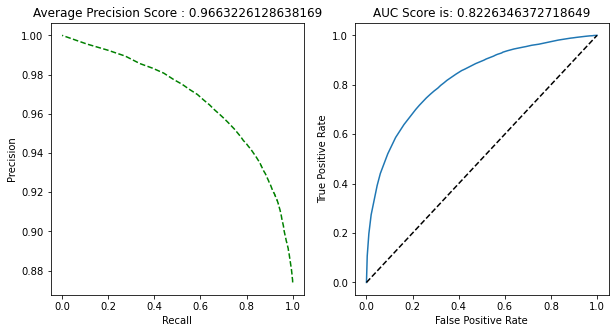

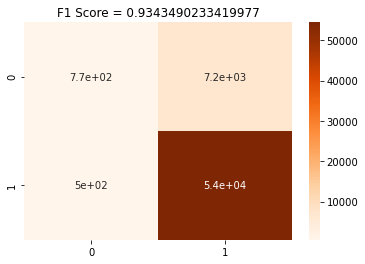

In [292]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=97)
score_rf= CrossVal(X_train_scaled,y_train,rf) # Here we called CrossVal function from above
print('Accuracy is:',score_rf)
rf.fit(X_train_scaled,y_train)
plotting(y_test,rf.predict_proba(X_test_scaled))  # Here we called plotting function from above

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,rf.predict(X_test_scaled)), annot= True, cmap='Oranges')

rf_f1=f1_score(y_test,rf.predict(X_test_scaled))
plt.title('F1 Score = {}'.format(rf_f1))

Text(0.5, 1.0, 'Feature Importance')

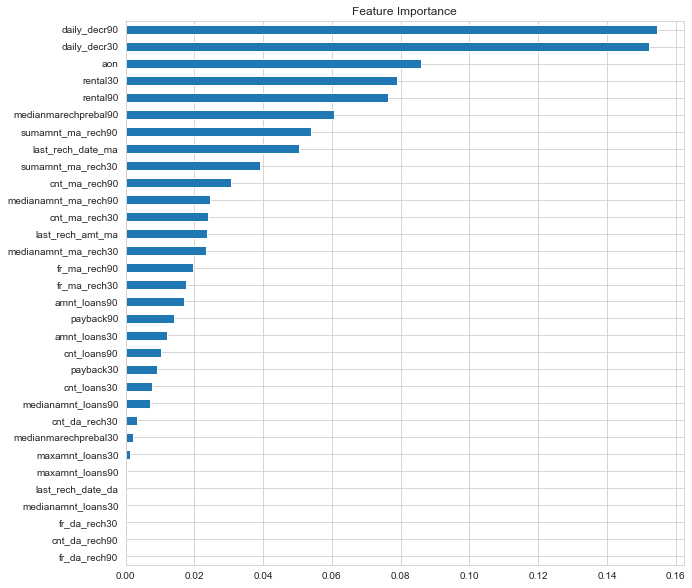

In [294]:
fig= plt.figure(figsize=(10,10))
important=pd.Series(rf.feature_importances_, index= X_train.columns)
sns.set_style('whitegrid')
important.sort_values().plot.barh()
plt.title('Feature Importance')

# Insights

### Now we know the importance of the features which contribute in prediction and useless features which don't have any contribution, so we decide to droop all features which have no contribution or very less in prediciton.

In [104]:
data.columns  


Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [215]:
#data.drop(columns =['Unnamed: 0','msisdn','pcircle','pdate'], inplace= True)
data.drop(columns =['cnt_da_rech90', 'fr_da_rech90', 'fr_da_rech30', 'medianamnt_loans30', 'last_rech_date_da', 'maxamnt_loans90', 'maxamnt_loans30',
'medianmarechprebal30', 'cnt_da_rech30', 'medianamnt_loans90'], inplace= True)


In [101]:
data.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30',
       'amnt_loans30', 'cnt_loans90', 'amnt_loans90', 'payback30',
       'payback90'],
      dtype='object')

# Imbalanced Dataset problem
Imbalanced classes put “accuracy” out of business. This is a surprisingly common problem in machine learning (specifically in classification), occurring in datasets with a disproportionate ratio of observations in each class.

Standard accuracy no longer reliably measures performance, which makes model training much trickier.

Imbalanced classes appear in many domains, including:

Fraud detection
Spam filtering
Disease screening
SaaS subscription churn
Advertising click-throughs

# Upsampling the minority or downsampling the majority class for imbanaced data sets.

### Up-sample the minority class
### Down-sample the majority class
### Change your performance metric
### Penalize algorithms (cost-sensitive training)
### Use tree-based algorithms

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

There are several heuristics for doing so, but the most common way is to simply resample with replacement.

First, we'll import the resampling module from Scikit-Learn:

# Upsampling minority class 

In [119]:
data[data.label==1]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,4617.5,1,0.0,...,0,5787.0,3650.5,61.04,1.0,12,1.0,12,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539.0,1,0.0,...,0,1539.0,1539.0,66.32,1.0,6,1.0,6,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947.0,0,0.0,...,0,947.0,947.0,2.50,2.0,12,2.0,12,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309.0,7,2.0,...,2,23496.0,2888.0,35.00,7.0,42,7.0,42,2.333333,2.333333
5,1,568.0,2257.362667,2261.460000,368.13,380.13,2.0,1539.0,4,10.0,...,0,11744.0,1539.0,55.90,3.0,18,3.0,18,9.375000,8.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048.0,3,2.0,...,2,10404.0,3178.0,91.81,2.0,12,2.0,12,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773.0,4,1.0,...,2,4038.0,773.0,111.80,3.0,18,3.0,18,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539.0,5,8.0,...,5,18592.0,1539.0,47.13,4.0,42,6.0,54,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773.0,5,4.0,...,4,17941.0,2410.5,100.00,2.0,18,3.0,24,0.000000,10.500000


In [120]:
data[data.label==0]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539.0,2,15.0,...,20,3078.0,1539.0,7.50,2.0,12,2.0,12,9.375,11.25
11,0,82.0,65.166667,65.166667,326.20,326.20,17.0,4617.5,2,0.0,...,0,9065.0,3650.5,489.00,1.0,6,1.0,6,0.000,0.00
15,0,1037.0,12.000000,12.000000,1216.80,1216.80,0.0,0.0,0,0.0,...,0,0.0,0.0,0.00,1.0,6,1.0,6,0.000,0.00
16,0,1583.0,1000.000000,1000.000000,1000.80,1087.88,0.0,0.0,0,0.0,...,0,0.0,0.0,0.00,1.0,6,1.0,6,0.000,0.00
21,0,378.0,514.693333,515.200000,56.26,58.20,2.0,773.0,1,0.0,...,20,1546.0,773.0,283.50,2.0,12,2.0,12,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209547,0,153.0,5670.733333,5672.200000,1817.08,2764.88,0.0,0.0,0,0.0,...,0,0.0,0.0,0.00,1.0,6,1.0,6,0.000,0.00
209549,0,843.0,729.235000,758.470000,7470.90,9537.90,1.0,770.0,1,0.0,...,20,6557.0,3278.5,49.82,1.0,6,2.0,12,0.000,11.25
209554,0,744.0,1454.491667,1461.750000,559.73,655.28,31.0,2309.0,0,0.0,...,0,2309.0,2309.0,20.00,1.0,6,1.0,6,0.000,0.00
209571,0,827.0,1867.668667,1881.180000,1875.72,2312.65,14.0,1924.0,2,3.0,...,3,3848.0,1924.0,6.20,1.0,6,1.0,6,0.000,0.00


In [216]:
# Separate majority and minority classes
df_majority = data[data.label==1]
df_minority = data[data.label==0]
#df_majority = data[data.balance==0]
#df_minority = data[data.balance==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=183431,    # to match majority class
                                 random_state=222) # reproducible results
# Upsample minority class
#df_minority_upsampled = resample(df_minority, 
#                                 replace=False,     # sample with replacement
#                                 n_samples=183431,    # to match majority class
#                                 random_state=2) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.value_counts()
# 1    183431
# 0    183431
# Name: balance, dtype: int64

label  aon    daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  medianmarechprebal90  cnt_loans30  amnt_loans30  cnt_loans90  amnt_loans90  payback30  payback90
0      81.0   0.000000      0.00          0.00      0.00      0.0                0.0               0              0.0           0.0                0.0                   0              0             0.0                0.0                   0.00                  1.0          6             1.0          6             0.000      0.000000     51
       61.0   0.000000      0.00          0.00      0.00      0.0                0.0               0              0.0           0.0                0.0                   0              0             0.0                0.0                   0.00                  1.0          6             1.0          6             0.000  

In [217]:
print(df_upsampled.label.value_counts())

1    183431
0    183431
Name: label, dtype: int64


In [104]:
print(data.label.value_counts())

1    183431
0     26162
Name: label, dtype: int64


In [105]:
df_upsampled.shape

(366862, 23)

In [218]:
df_upsampled.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30',
       'amnt_loans30', 'cnt_loans90', 'amnt_loans90', 'payback30',
       'payback90'],
      dtype='object')

In [219]:
X = df_upsampled.drop(['label'], axis=1)
y = df_upsampled['label']


In [107]:
#Split the dataset

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=5)

## To scale the dimensions we need scale function which is part of scikit preprocessing libraries
#### from sklearn.preprocessing import StandardScaler, MinMaxScaler 
#### data_scaled=MinMaxScaler().fit_transform(data) 
#### data_scaled=pd.DataFrame(data=data_scaled, columns=data.columns) /// we can use this also for 
#### Normalization (To get value b/w 0 and 1)

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. ... If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units

In [112]:
from sklearn import preprocessing
from scipy.stats import zscore

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

# Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

In [226]:
print('Train score: {}'.format(logreg.score(X_train_scaled, y_train) * 100))
print('Test score: {}'.format(logreg.score(X_test_scaled, y_test) * 100))

Train score: 76.0641425528518
Test score: 75.97107006242106


In [227]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[43537 11331]
 [15115 40076]]


In [228]:
accuracies = {}
acc_logreg = logreg.score(X_test_scaled, y_test) * 100
accuracies['Logistic Regression'] = acc_logreg
print("Logistic Regression Accuracy: {}".format(acc_logreg))

Logistic Regression Accuracy: 75.97107006242106


# Naive Bayes

In [232]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [233]:
predicted = nb.predict(X_test_scaled)
print(metrics.classification_report(y_test, predicted))          
print('Total accuracy:', np.round(metrics.accuracy_score(y_test, predicted),2))    

              precision    recall  f1-score   support

           0       0.67      0.86      0.76     54868
           1       0.81      0.59      0.68     55191

    accuracy                           0.72    110059
   macro avg       0.74      0.72      0.72    110059
weighted avg       0.74      0.72      0.72    110059

Total accuracy: 0.72


In [234]:
print('Train score: {}'.format(nb.score(X_train_scaled, y_train) * 100))
print('Test score: {}'.format(nb.score(X_test_scaled, y_test) * 100))

Train score: 72.38388959630534
Test score: 72.30485466885943


In [235]:
print(metrics.confusion_matrix(y_test,predicted))

[[47134  7734]
 [22747 32444]]


In [236]:
acc_nb = nb.score(X_test_scaled, y_test) * 100
accuracies['Naive Bayes'] = acc_nb
print("Naive Bayes Accuracy: {}".format(acc_nb))

Naive Bayes Accuracy: 72.30485466885943


Text(0.5, 1.0, 'F1 Score = 0.680388805586721')

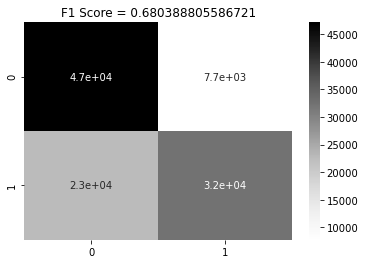

In [237]:
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,nb.predict(X_test_scaled)), annot= True, cmap='Greys')
nb_f1=f1_score(y_test,nb.predict(X_test_scaled))  
plt.title('F1 Score = {}'.format(nb_f1))


# XGBoost Classifier

In [238]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\Ganesh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 76.70%


C:\Users\Ganesh\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Text(0.5, 1.0, 'F1 Score = 0.7873691891802245')

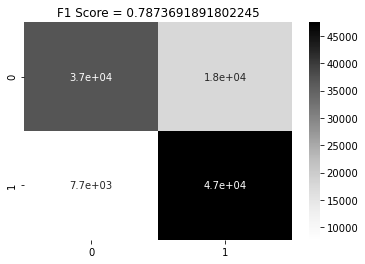

In [239]:
fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,xgb_model.predict(X_test_scaled)), annot= True, cmap='Greys')
nb_f1=f1_score(y_test,xgb_model.predict(X_test_scaled))  
plt.title('F1 Score = {}'.format(nb_f1))


# Support Vector Machine (SVM)

In [240]:
from sklearn import svm
svm = svm.SVC(gamma = 0.025, C = 3)
svm.fit(X_train_scaled, y_train)

SVC(C=3, gamma=0.025)

In [241]:
svm.score(X_test_scaled, y_test) 

0.7917934925812519

In [242]:
y_pred = svm.predict(X_test_scaled)

print('Train score: {}'.format(svm.score(X_train_scaled, y_train) * 100))
print('Test score: {}'.format(svm.score(X_test_scaled, y_test) * 100))

Train score: 79.31605160375852
Test score: 79.17934925812519


In [243]:
acc_svm = svm.score(X_test_scaled, y_test) * 100
accuracies['SVM'] = acc_svm

In [244]:
print(metrics.confusion_matrix(y_test, y_pred))

[[46408  8460]
 [14455 40736]]


# KNN Model

The optimal number of neighbors is 1


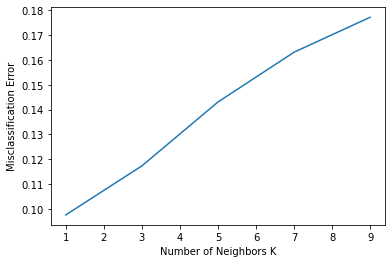

In [245]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate


# creating odd list of K for KNN
myList = list(range(1,10))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # predict the response
    y_pred = knn.predict(X_test_scaled)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)


# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)


plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [246]:
#the above graph sometimes shows 3,5 7,9 and sometimes 1 however as 1 is the right answer hence used it below.
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')

In [247]:
X_z = X.apply(zscore)
X_z.describe()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,payback30,payback90
count,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05,...,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05,3.668620e+05
mean,-1.439211e-16,-2.025700e-13,-1.071738e-13,1.911774e-14,-6.854287e-14,-6.619522e-14,-4.298659e-13,6.017424e-13,-2.568050e-13,-3.280918e-13,...,4.629855e-14,-6.050687e-14,-3.398075e-13,3.114389e-14,-5.741706e-13,-4.843115e-13,-3.982255e-13,5.599642e-13,-1.765935e-13,-4.966865e-14
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.102148e-01,-6.320061e-01,-6.202737e-01,-6.394208e+00,-8.717213e+00,-3.136702e+00,-1.078555e+00,-9.001033e-01,-6.438030e-01,-8.072256e-01,...,-6.705459e-01,-7.822229e-01,-1.188631e+00,-6.201645e-01,-1.167894e+00,-1.157405e+00,-1.005994e+00,-1.015465e+00,-5.904570e-01,-6.223481e-01
25%,-1.068933e-01,-6.109734e-01,-6.009578e-01,-5.480028e-01,-7.228788e-01,-5.242036e-01,-5.032355e-01,-9.001033e-01,-6.438030e-01,-8.072256e-01,...,-6.705459e-01,-7.021504e-01,-4.834273e-01,-1.679974e-01,-6.167032e-01,-6.393031e-01,-6.268935e-01,-6.425082e-01,-5.904570e-01,-6.223481e-01
50%,-1.035074e-01,-5.098205e-01,-5.073190e-01,-3.752659e-01,-4.515885e-01,-3.500370e-01,-3.709868e-01,-2.216605e-01,-6.438030e-01,-4.221467e-01,...,-5.238682e-01,-4.156296e-01,-3.213222e-01,-1.137553e-01,-6.167032e-01,-6.393031e-01,-6.268935e-01,-6.425082e-01,-5.904570e-01,-6.223481e-01
75%,-9.777848e-02,1.542882e-01,1.214667e-01,1.134450e-01,3.480266e-01,8.537942e-02,7.731374e-02,4.567822e-01,2.592176e-01,3.515073e-01,...,3.561978e-01,2.867918e-01,2.281868e-01,-2.597775e-02,4.856792e-01,3.969011e-01,1.313069e-01,1.034047e-01,3.152349e-01,3.297206e-01
max,1.276264e+01,2.985001e+00,2.947154e+00,4.805315e+01,2.445467e+00,9.229125e+00,2.371492e+00,2.831332e+00,2.742524e+00,2.974472e+00,...,2.263007e+00,3.001230e+00,2.154674e+00,9.313643e+01,3.517231e+00,3.246463e+00,3.164108e+00,3.087056e+00,2.593616e+00,2.508493e+00


In [248]:
X = np.array(X_z)
y = np.array(y)

In [249]:
print(X.shape)
print(y.shape)

(366862, 22)
(366862,)


In [250]:
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
knn.score(X_test_scaled, y_test)

0.9024886651704994

In [251]:
print('Train score: {}'.format(knn.score(X_train_scaled, y_train) * 100))
print('Test score: {}'.format(knn.score(X_test_scaled, y_test) * 100))

Train score: 99.94431529226684
Test score: 90.24886651704995


In [254]:
cm_knn = print(metrics.confusion_matrix(y_test, y_pred))
cm_knn 

[[49944  4924]
 [ 5808 49383]]


In [255]:
acc_knn = knn.score(X_test_scaled, y_test) * 100
accuracies['KNN'] = acc_knn

In [256]:
print(accuracies['KNN'])

90.24886651704995


# Test Accuracy of KNN algo is 90.25. 
### Here, We tried different types of ML models i.e.  SVM,  XGBoost, Naive Bayes and Logistic Regression but accuracy score and F1 score is not more than 80% apprx except KNN whos accuracy score is 90.25%. This score is not good for our macro_credit loan default prediction model because we want atleast more than 95% accuracy to make good prediction which in turn makes no-profit no-loss i.e. to achieve atleast breakeven point for our financial organization.


# TRY with other methods and if required use hyperameter tuning and k-fold cv as well to get the accuracy more than 95% for the prediction and if it does then we will go to productionalize this model via docker and kubernete engine in AWS. Here we have to install different libraries as well.

In [132]:
#!pip install tensorflow

In [133]:
#!pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)


In [259]:
#import numpy as np
#from matplotlib import pyplot
#from pandas import read_csv
#from pandas import set_option
#import pandas as pd
#from sklearn.preprocessing import LabelEncoder
#from keras.utils import np_utils
#from sklearn import preprocessing
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import MultiLabelBinarizer
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from pandas.plotting import scatter_matrix
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
#from sklearn.pipeline import Pipeline
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier


import tensorflow as tf
from tensorflow import keras


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras.utils import np_utils
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Make X and Y variables i.e. independent and target variables

In [221]:
X = df_upsampled.drop(['label'], axis=1)
y = df_upsampled['label']


# Split the data into train and test sets

In [222]:
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [223]:
from sklearn import preprocessing
from scipy.stats import zscore

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_validation)       #(X_test)

# #Spot-Check Algorithms use to check which algo is the best for our business problem 

In [224]:
#validation_size = 0.20
#seed = 7
#num_folds = 10
#scoring = 'accuracy'

#X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

#Spot-Check Algorithms
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))


In [111]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())b
    print(msg)

LDA: 0.874483 (0.004158)
KNN: 0.883524 (0.001952)
CART: 0.866610 (0.002177)
NB: 0.646672 (0.003074)


# Compare Algorithms

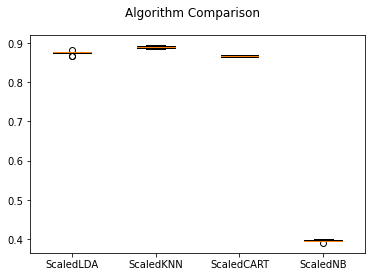

In [225]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Evaluate Algorithms: Using Standardize Data

In [226]:
# Evaluate Algorithms: Using Standardize Data

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
#pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())h
    print(msg)

ScaledLDA: 0.754420 (0.001551)
ScaledKNN: 0.872690 (0.001243)
ScaledCART: 0.950993 (0.001288)
ScaledNB: 0.723421 (0.002021)


# Plot the distribution of the accuracy scores using box and whisker plots.
# Compare Algorithms

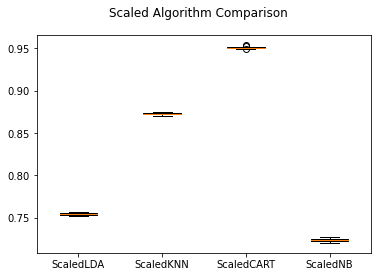

In [227]:
# plot the distribution of the accuracy scores using box and whisker plots.
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Ensemble Methods for improve the performance of algorithms
 we will evaluate four different ensemble machine learning
 algorithms, two boosting and two bagging methods:

In [228]:
# Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
# Bagging Methods: Random Forests (RF) and Extra Trees (ET).

#ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)h
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
b

AB: 0.787638 (0.002038)
GBM: 0.804511 (0.001506)
RF: 0.975301 (0.000258)
ET: 0.981795 (0.000621)


# Insights
## Here we got the 98.17% score for the ExtraTreesClassifier() and this is the best model for our problem, So finally we are going to use this for our predicition.

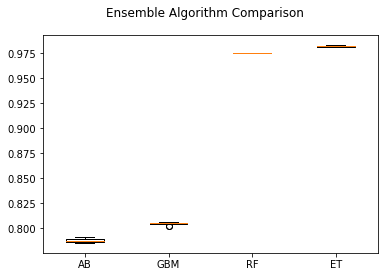

In [229]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


# Insights
### WE got the 98% accuracy with ExtraTree Classifier.showed the most promise as a low complexity and stable model for this problem and this is the best model we can deploy in production.

# Modelling with ExtraTreesClassifier()

In [240]:
ext_tree_clf = ExtraTreesClassifier()
ext_tree_clf.fit(X_train,Y_train)
print("Train Score {:.2f} & Test Score {:.2f}".format(ext_tree_clf.score(X_train,Y_train),ext_tree_clf.score(X_validation, Y_validation)))



Train Score 1.00 & Test Score 0.98


# This is the best model now we have for our macro_credit_loan defaulter and non defaulter prediction.

In [261]:
y_pred = ext_tree_clf.predict(X_validation)
print(classification_report(Y_validation,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     36614
           1       1.00      0.97      0.98     36759

    accuracy                           0.98     73373
   macro avg       0.98      0.98      0.98     73373
weighted avg       0.98      0.98      0.98     73373



# Conclusion

# The classification report for ExtraTreesClassifier is as follows:

### Precision: When Macro_credit_loans are predicted to be bad they are bad 97% of the time
### Recall: Of all the true bad-macro_credit_loans, this model identified 100% of them
### F1-score: The harmonic-mean of the Precision​ and Recall, 98% for bad macro_credit_loans
### 100% of the bad loans were identified by the model. However, of all the in the test-set declined by this model only 3% (1–0.97) 